In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:

def visualize_polygon(polygon):
    plt.plot(polygon[:, 0], polygon[:, 1])

def visualize_augmented_data(polygon, augmented_data):
    num_samples = len(augmented_data)
    plt.figure(figsize=(10, 10))

    plt.subplot(1, num_samples + 1, 1)
    visualize_polygon(polygon)
    plt.title('Original Polygon')

    for i in range(num_samples):
        plt.subplot(1, num_samples + 1, i + 2)
        visualize_polygon(augmented_data[i])
        plt.title('Augmented Polygon{}'.format(i + 1))

def augment_data(polygon, num_samples):
    augmented_data = []
    for _ in range(num_samples):
        scale = np.random.uniform(0.5, 2.0)
        rotation = np.random.uniform(-180.0, 180.0)
        translation = np.random.uniform(-10.0, 10.0, size=2)

        augmented_polygon = polygon * scale
        augmented_polygon = np.dot(augmented_polygon,
                                   np.array([[np.cos(rotation), -np.sin(rotation)],
                                             [np.sin(rotation), np.cos(rotation)]]))
        augmented_polygon += translation
        augmented_polygon = np.clip(np.round(augmented_polygon), 0, 256).astype(int)

        augmented_data.append(augmented_polygon)

    return augmented_data


In [44]:
import numpy as np
import matplotlib.pyplot as plt
import os 

def scale_polygon_coordinates(polygon_coordinates):
    # Step 1: Find the minimum and maximum coordinates
    x_coords = [coord[0] for coord in polygon_coordinates]
    y_coords = [coord[1] for coord in polygon_coordinates]
    x_min = min(x_coords)
    x_max = max(x_coords)
    y_min = min(y_coords)
    y_max = max(y_coords)

    # Step 2: Calculate the width and height of the original coordinates
    width = x_max - x_min
    height = y_max - y_min

    # Step 3: Calculate the scaling factors
    scale = 256 / max(width, height)

    # Step 4: Scale the coordinates
    scaled_coordinates = []
    for coord in polygon_coordinates:
        scaled_x = (coord[0] - x_min) * scale
        scaled_y = (coord[1] - y_min) * scale
        scaled_coordinates.append([scaled_x, scaled_y])

    return np.array(scaled_coordinates)

def visualize_polygon(polygon):
    plt.figure()
    plt.plot(polygon[:, 0], polygon[:, 1], 'b-')
    plt.axis('equal')
    plt.show()

def save_polygon_image(polygon, filename):
    plt.figure()
    plt.plot(polygon[:, 0], polygon[:, 1], 'b-')
    plt.axis('equal')
    plt.savefig(filename)
    plt.close()

def generate_augmented_data(polygon, num_samples):
    augmented_data = []
    augmented_data.append(polygon)  # 添加原始样本

    for _ in range(num_samples - 1):
        augmented_polygon = polygon.copy()

        # 缩放
        scale_factor = np.random.uniform(0.5, 2.0)
        augmented_polygon *= scale_factor

        # 旋转
        angle = np.random.uniform(0, 360)
        rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)],
                                    [np.sin(angle), np.cos(angle)]])
        augmented_polygon = np.dot(augmented_polygon, rotation_matrix)

        # 平移
        translation = np.random.uniform(-50, 50, size=(2,))
        augmented_polygon += translation

        # print(augmented_polygon)
        augmented_polygon = scale_polygon_coordinates(augmented_polygon)
        # print(augmented_polygon)

        augmented_polygon_base = augmented_polygon.copy()

        # 扰动
        for i in range(len(augmented_polygon)):
            # 插值增加点
            if i < len(augmented_polygon) - 1:
                num_interpolations = np.random.choice([0,0,0,1,2,3])
                for _ in range(num_interpolations):
                    interpolated_point = (augmented_polygon[i] + augmented_polygon[i + 1]) / 2
                    augmented_polygon = np.insert(augmented_polygon, i + 1, interpolated_point, axis=0)

            # 坐标沿着直线的垂直方向进行小范围移动
            perturbation = np.random.uniform(-5, 5, size=(2,))
            augmented_polygon[i] += perturbation

        augmented_data.append(augmented_polygon.copy())
        # 限制坐标值在0-256之间
        # augmented_polygon = np.clip(augmented_polygon, 0, 256).astype(int)
        augmented_polygon_base = list(augmented_polygon_base.astype(int))
        augmented_polygon = list(augmented_polygon.astype(int))

        print(augmented_polygon_base,'->',augmented_polygon)
        

    return augmented_data


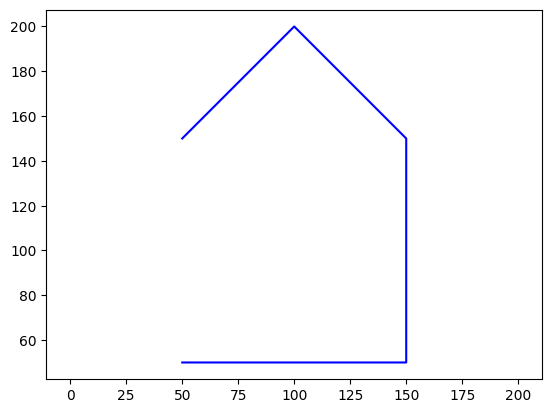

[array([ 0, 28]), array([161,   0]), array([189, 161]), array([123, 256]), array([ 28, 189])] -> [array([-4, 28]), array([157,  -3]), array([187, 161]), array([153, 211]), array([140, 227]), array([135, 238]), array([131, 244]), array([123, 256]), array([ 28, 189])]
[array([ 0, 38]), array([157,   0]), array([196, 157]), array([137, 256]), array([ 38, 196])] -> [array([ 1, 36]), array([75, 19]), array([157,   0]), array([197, 152]), array([140, 258]), array([ 38, 196])]
[array([255, 105]), array([150, 241]), array([ 14, 135]), array([ 0, 14]), array([120,   0])] -> [array([253, 107]), array([233, 141]), array([220, 147]), array([221, 149]), array([222, 152]), array([220, 151]), array([219, 152]), array([216, 156]), array([203, 173]), array([150, 241]), array([ 14, 135]), array([ 0, 14]), array([120,   0])]
[array([165, 256]), array([  0, 241]), array([14, 75]), array([104,   0]), array([180,  90])] -> [array([164, 253]), array([  0, 237]), array([  6, 196]), array([  4, 158]), array([ 

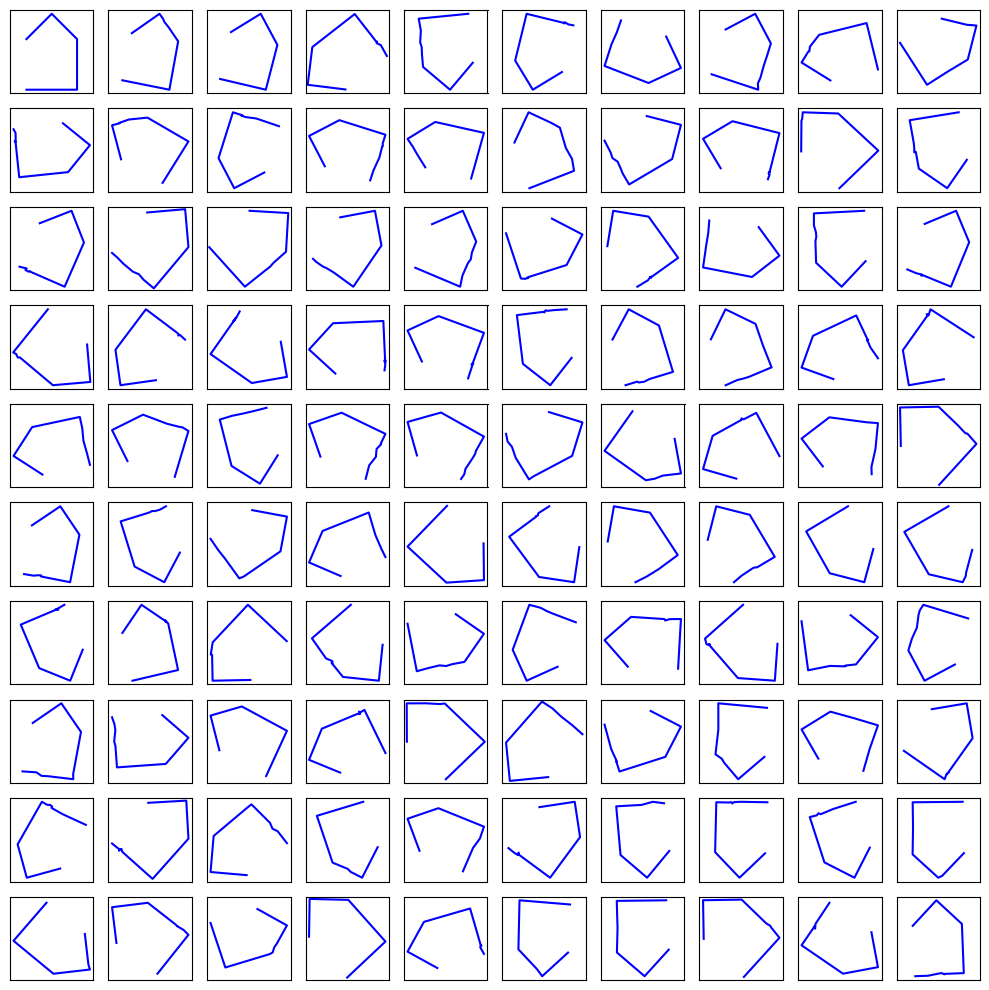

In [45]:
data_dir = 'data'
if not os.path.exists(data_dir):
    os.makedirs(data_dir)
# 示例用法
# 假设有一个多边形 polygon，由 N 个点构成
# N = 4
# polygon = np.random.randint(0, 256, size=(N, 2))
polygon = np.array([[50, 50], [150, 50], [150, 150], [100, 200], [50, 150]])
# 可视化数据
visualize_polygon(polygon)

# 保存原始样本
save_polygon_image(polygon, os.path.join(data_dir,'original_polygon.png'))

# 生成增强数据
num_samples = 100
augmented_data = generate_augmented_data(polygon.astype(float), num_samples)

# 可视化多个多边形的增强样本，避免图像挤成一团
plt.figure(figsize=(10, 10))
for i, augmented_polygon in enumerate(augmented_data):
    plt.subplot(10, 10, i+1)
    plt.plot(augmented_polygon[:, 0], augmented_polygon[:, 1], 'b-')
    plt.axis('equal')
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
plt.show()

# 保存增强数据
for i, augmented_polygon in enumerate(augmented_data):
    filename = f'augmented_polygon_{i+1}.png'
    save_polygon_image(augmented_polygon, os.path.join(data_dir,filename))

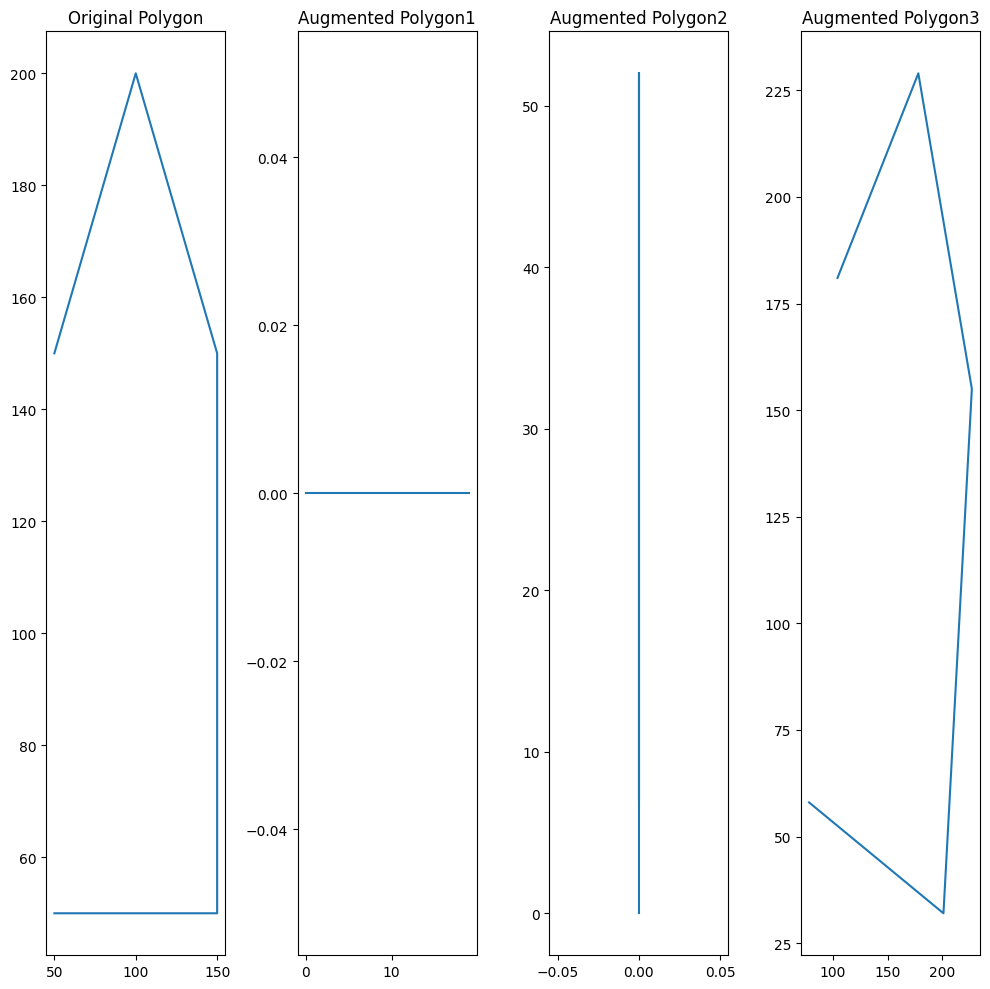

In [5]:

# 示例数据
polygon = np.array([[50, 50], [150, 50], [150, 150], [100, 200], [50, 150]])
num_samples = 3

# 可视化原始多边形及增强后的数据
augmented_data = augment_data(polygon, num_samples)
visualize_augmented_data(polygon, augmented_data)

plt.tight_layout()
plt.show()

In [2]:
import cv2
import numpy as np
import os

ImportError: libGL.so.1: cannot open shared object file: No such file or directory

In [ ]:

def visualize_polygon(polygon, save_path=None):
    image = np.zeros((256, 256, 3), dtype=np.uint8)
    cv2.polylines(image, [polygon.reshape((-1, 1, 2))], True, (0, 255, 0), 2)

    if save_path is not None:
        cv2.imwrite(save_path, image)

    cv2.imshow("Polygon Visualization", image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

def save_augmented_data(polygon, augmented_data, save_dir):
    os.makedirs(save_dir, exist_ok=True)

    for i, augmented_polygon in enumerate(augmented_data):
        save_path = os.path.join(save_dir, "augmented_polygon_{:03d}.png".format(i))
        visualize_polygon(augmented_polygon, save_path=save_path)

def augment_data(polygon, num_samples):
    augmented_data = []
    for _ in range(num_samples):
        scale = np.random.uniform(0.5, 2.0)
        rotation = np.random.uniform(-180.0, 180.0)
        translation = np.random.uniform(-10.0, 10.0, size=2)

        augmented_polygon = polygon * scale
        augmented_polygon = np.dot(augmented_polygon,
                                   np.array([[np.cos(rotation), -np.sin(rotation)],
                                             [np.sin(rotation), np.cos(rotation)]]))
        augmented_polygon += translation
        augmented_polygon = np.clip(np.round(augmented_polygon), 0, 256).astype(int)

        augmented_data.append(augmented_polygon)

    return augmented_data

# 示例数据
polygon = np.array([[50, 50], [150, 50], [150, 150], [100, 200], [50, 150]])
num_samples = 1000

# 可视化原始多边形
visualize_polygon(polygon)

# 生成增强的数据
augmented_data = augment_data(polygon, num_samples)

# 可视化增强后的数据并保存
save_dir = "augmented_data"
save_augmented_data(polygon, augmented_data, save_dir)